In [1]:
# Importing pandas and numpy.

import numpy as np
import pandas as pd 

In [2]:
# Reading the dataset and storing it into df variable. 

df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.shape

(1372, 5)

In [4]:
df.head(2)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [5]:
df.tail(2)

,variance,skewness,curtosis,entropy,class
1370,-3.5637,-8.38270,12.3930,-1.2823,1
1371,-2.5419,-0.65804,2.6842,1.1952,1


In [6]:
df.isna().sum()

# We can observe that none of the columns have missing values.

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
# Seperating the dataset into labels and features.

# X denotes features.
X = df.drop('class',axis=1)

# y denotes label or independent variable.
y = df['class']

In [8]:
X.shape, y.shape

((1372, 4), (1372,))

In [9]:
print(y.value_counts())

"""We could notice that the value counts (i.e., the number of 0's and 1's) are not far away from each other. 
   We can consider this as a balanced dataset."""

0    762
1    610
Name: class, dtype: int64


"We could notice that the value counts (i.e., the number of 0's and 1's) are not far away from each other. \n   We can consider this as a balanced dataset."

In [10]:
# Looking at the range of maximum and minimum values in a dataset

for x in X.columns:
    print(x,"Max: ",X[x].max(),"Min: ",X[x].min())

variance Max:  6.8248 Min:  -7.0421
skewness Max:  12.9516 Min:  -13.7731
curtosis Max:  17.9274 Min:  -5.2861
entropy Max:  2.4495 Min:  -8.5482


In [11]:
# Importing visualization libraries seaborn and matplotlib

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

In [12]:
X.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

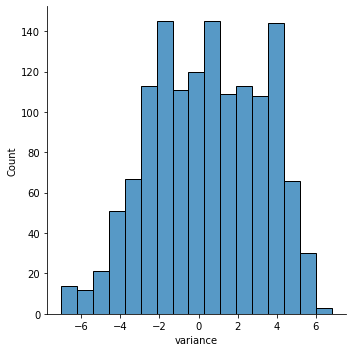

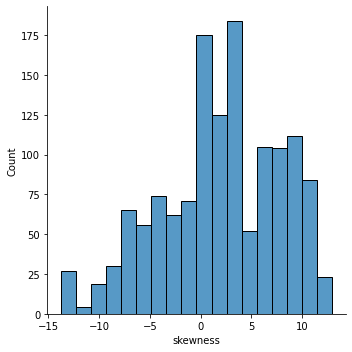

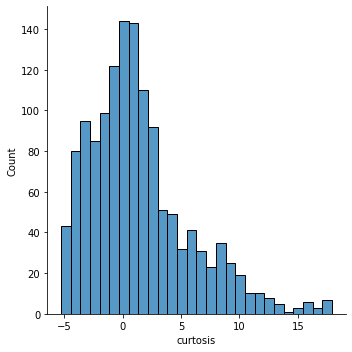

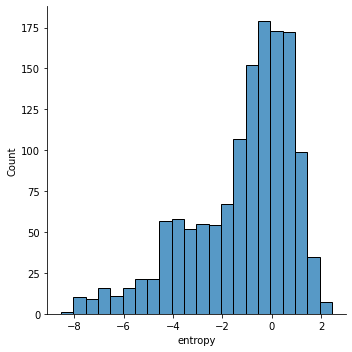

In [13]:
# Looking at the distribution of the each feature. 

for x in X.columns:
    sns.displot(X[x])

In [14]:
# Gathering the skewed features into a list 

skewed_features = ["curtosis","entropy"]

In [15]:
""" Applying various transformations to skewed features to get the data to be normally distributed"""

for x in skewed_features:
    #Applying log transformation on the features with skewed distribution
    X[x+'_log'] = np.log(X[x]+((X[x].min()*-1)+0.1))
    #Applying reciprocal transformation on the features with skewed distribution
    X[x+"_reciprocal"] = 1/(X[x]+((X[x].min()*-1)+0.1))
    #Applying exponential transformation on the features with skewed distribution
    X[x+"_exp"] = (X[x]+((X[x].min()*-1)+0.1))**(1/5)
    #Applying square_root transformation on the features with skewed distribution
    X[x+"_sqrRoot"] = (X[x]+((X[x].min()*-1)+0.1))**(1/2)

In [16]:
X.head(3)

,variance,skewness,curtosis,entropy,curtosis_log,curtosis_reciprocal,curtosis_exp,curtosis_sqrRoot,entropy_log,entropy_reciprocal,entropy_exp,entropy_sqrRoot
0,3.6216,8.6661,-2.8073,-0.44699,0.947324,0.387777,1.208603,1.605864,2.104282,0.121933,1.523265,2.863775
1,4.5459,8.1674,-2.4586,-1.46210,1.074149,0.341588,1.239651,1.710994,1.972149,0.139158,1.483538,2.680690
2,3.8660,-2.6383,1.9242,0.10645,1.989284,0.136793,1.488631,2.703757,2.169585,0.114225,1.543291,2.958826


In [17]:
# Importing stats library 

from scipy import stats

In [18]:
#Checking the fit of transformed features with probabilty plot

def prob_plot(data,feature):
    plt.figure(figsize=(14,7))
    plt.suptitle(feature)
    
    plt.subplot(1,2,1)
    data[feature].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist="norm",plot=plt)

In [19]:
# Gathering all the transformations of each features into lists for the convenience of performing further assesments

curtosis_transformations = [a for a in X.columns if a[0:len(skewed_features[0])]==skewed_features[0]]
entropy_transformations = [a for a in X.columns if a[0:len(skewed_features[1])]==skewed_features[1]]

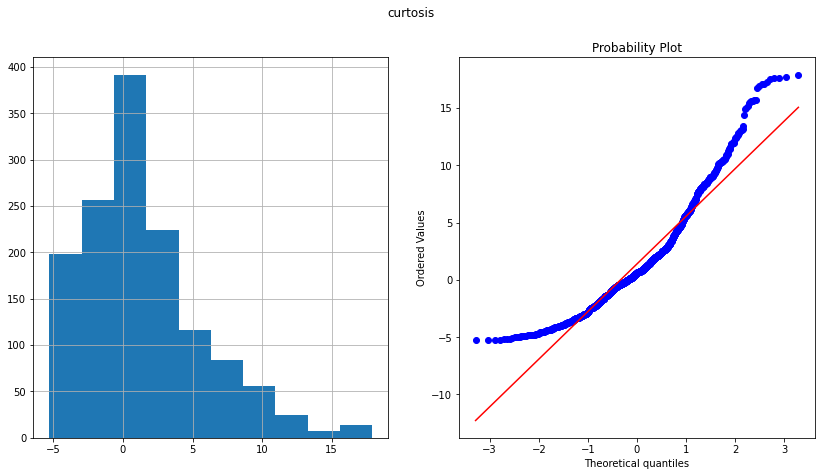

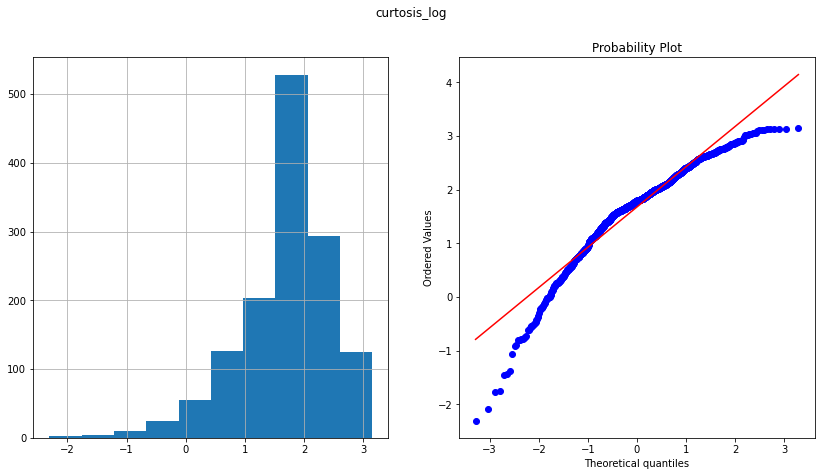

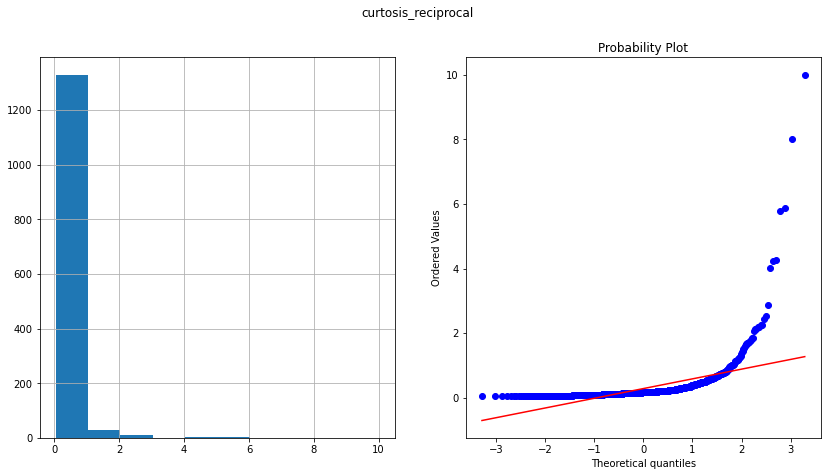

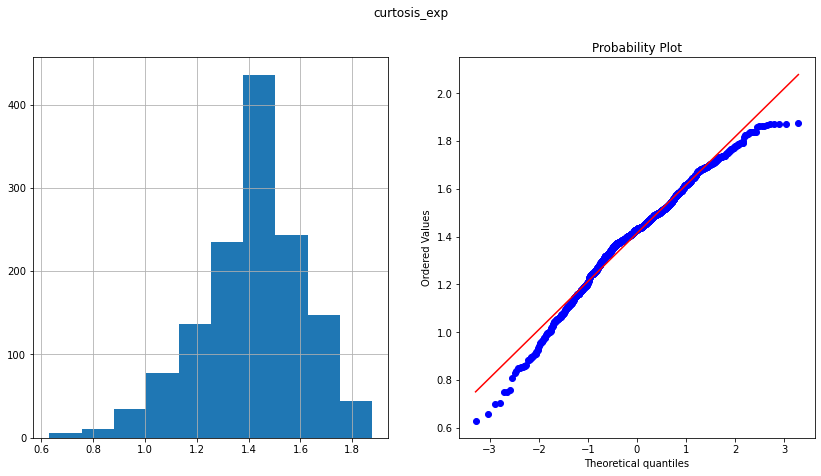

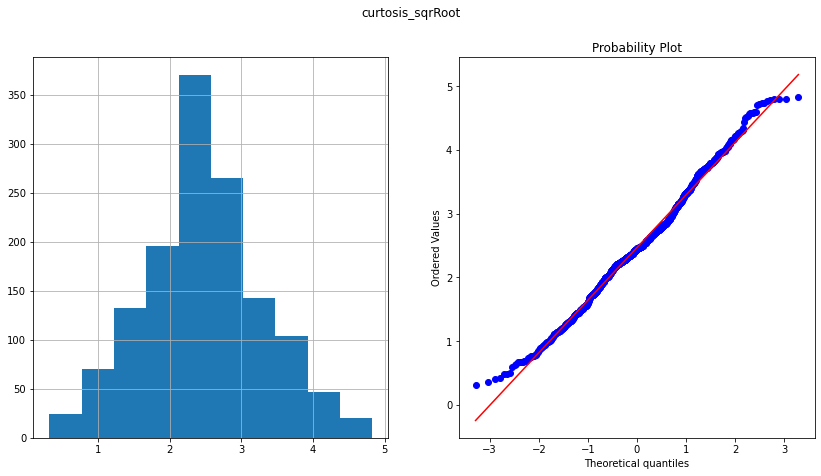

In [20]:
for x in curtosis_transformations:
    prob_plot(X,x)

In [20]:
pip freeze>req.txt


Note: you may need to restart the kernel to use updated packages.


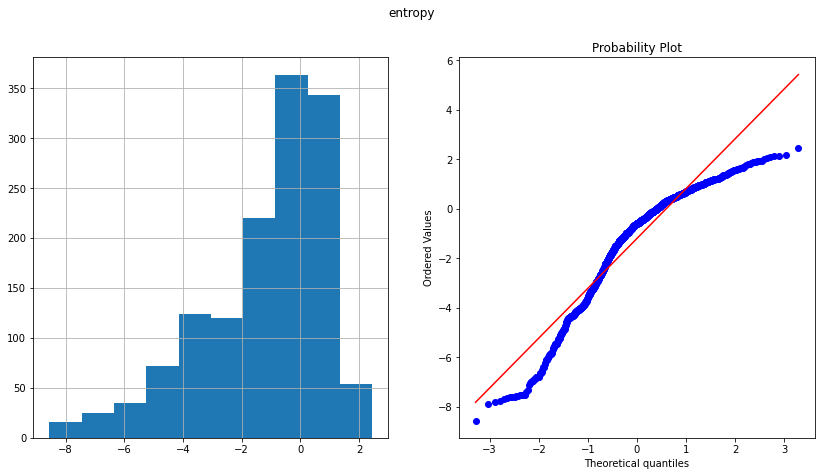

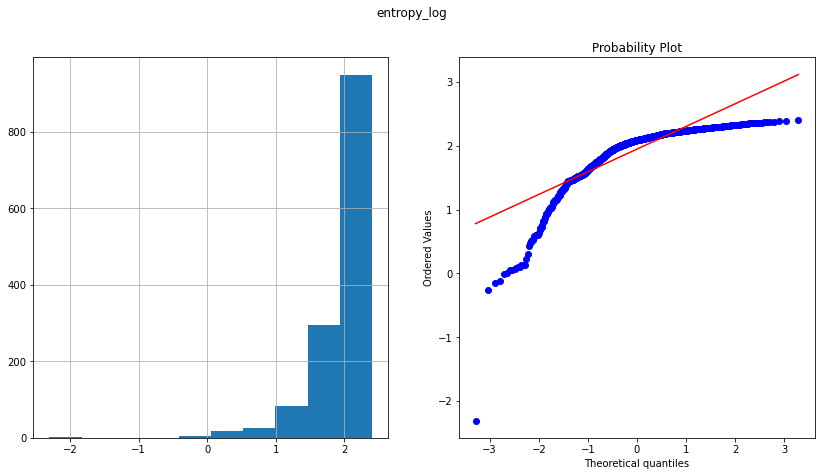

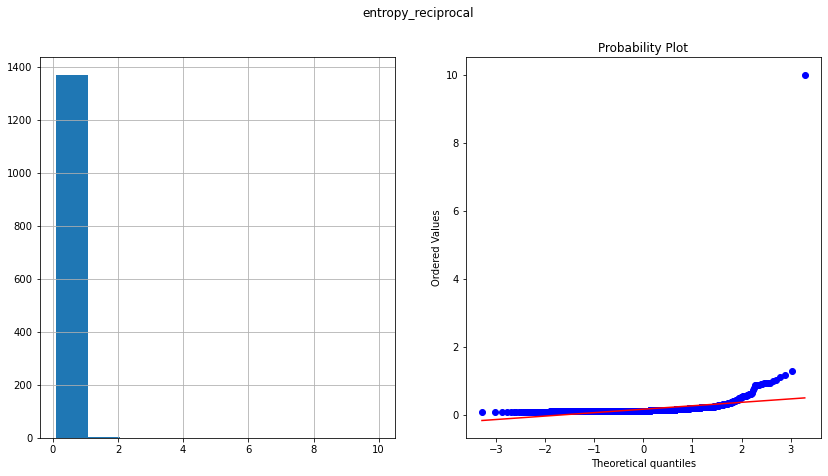

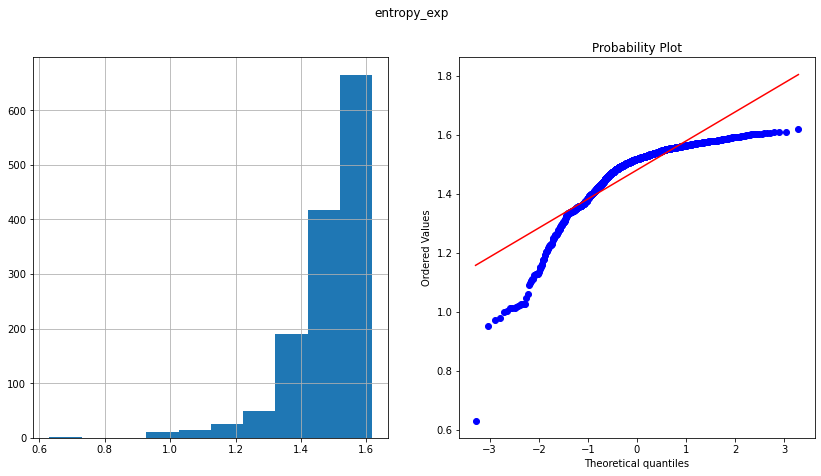

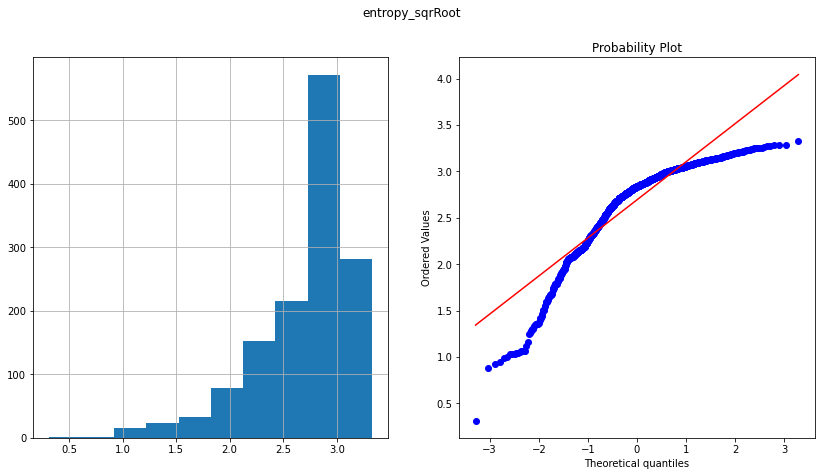

In [21]:
for x in entropy_transformations:
    prob_plot(X,x)

In [22]:
""" As we observe from the above graphs that square root transformation makes curtosis feature best fit the normal distribution. We can also observe that reciporocal transformation best works for entropy feature. Thus, we will remove all other features from the dataset"""

' As we observe from the above graphs that square root transformation makes curtosis feature best fit the normal distribution. We can also observe that reciporocal transformation best works for entropy feature. Thus, we will remove all other features from the dataset'

In [23]:
#Copying required values into original feature name and dropping features that are to be retained from the list.

X["entropy"] = X["entropy_reciprocal"]
X["curtosis"] = X["curtosis_sqrRoot"]

entropy_transformations.remove("entropy")
curtosis_transformations.remove("curtosis")

In [24]:
# Combining both the lists containing features to drop into one. 

drop_list = entropy_transformations+curtosis_transformations

In [25]:
# Dropping unnecessary features

X.drop(drop_list,axis=1,inplace=True)

In [26]:
X.head(3)

,variance,skewness,curtosis,entropy
0,3.6216,8.6661,1.605864,0.121933
1,4.5459,8.1674,1.710994,0.139158
2,3.8660,-2.6383,2.703757,0.114225


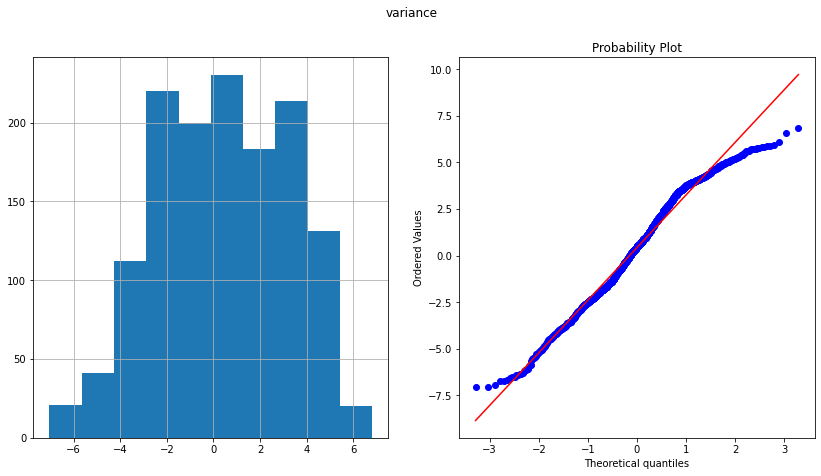

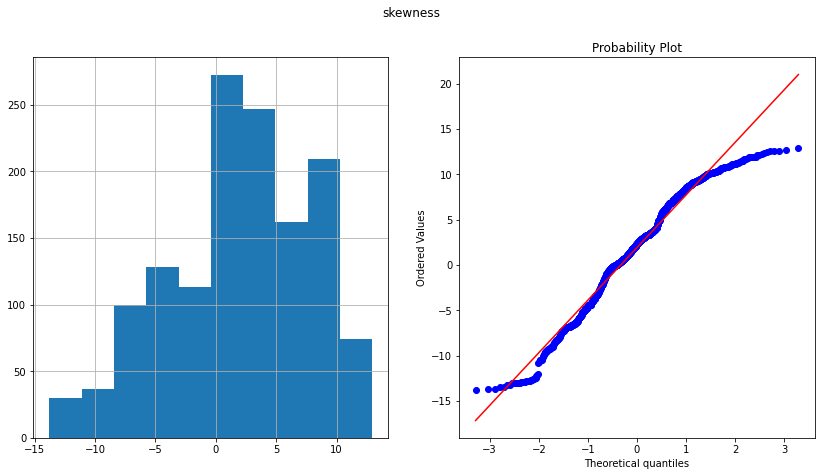

In [27]:
for x in X.columns[0:2]:
    prob_plot(X,x)

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.371848 -0.131926 -0.724843
skewness  0.264026  1.000000 -0.753461  0.198149 -0.444688
curtosis -0.371848 -0.753461  1.000000 -0.091204  0.108092
entropy  -0.131926  0.198149 -0.091204  1.000000 -0.019174
class    -0.724843 -0.444688  0.108092 -0.019174  1.000000


'We can observe that there is no positive correlation between features and label. However, negatve correlation can be spotted between some features. '

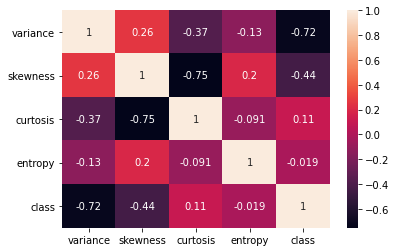

In [28]:
# Checking for correlation between features and label

X['class'] = df['class']

print(X.corr())

# Visualizing the correlation with a heatmap
sns.heatmap(X.corr(),annot=True)

"""We can observe that there is no positive correlation between features and label. However, negatve correlation can be spotted between some features. """

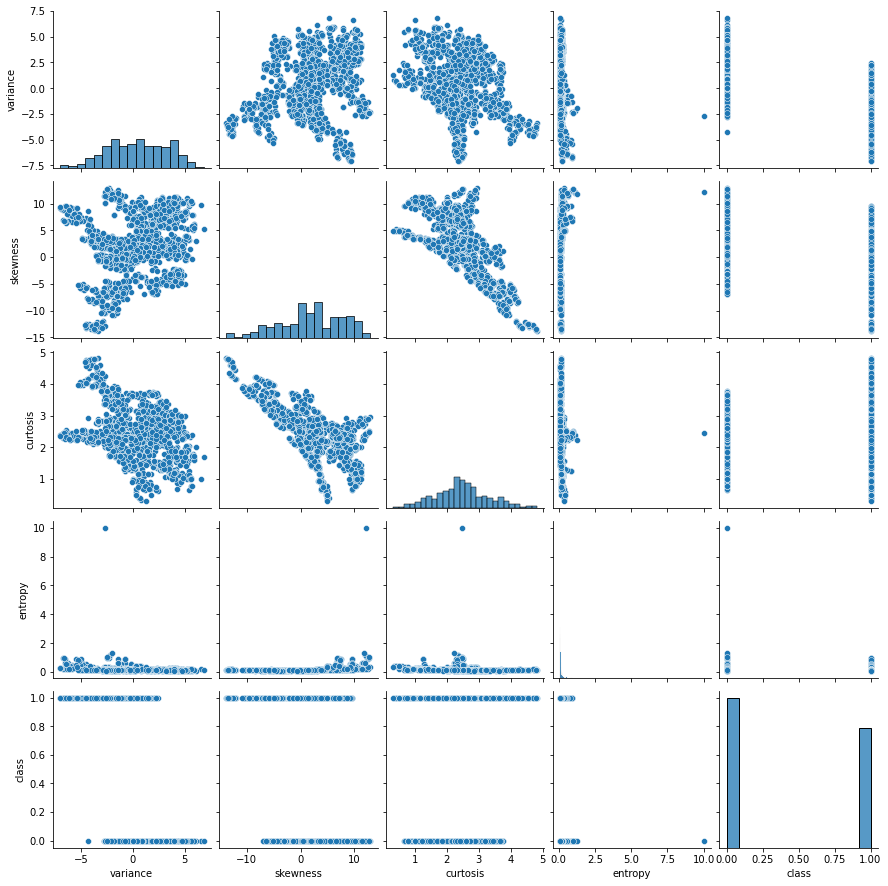

In [29]:
# Plotting all the variables against each other.

sns.pairplot(X)

# We can observe that no feature has linear relationship with another. 

In [30]:
# Detecting outliers using Inter-quantile range and finding possible measures to deal with them.

Q1, Q3 = X.quantile(0.20),X.quantile(0.85)

IQR = Q3 - Q1

In [31]:
IQR

variance     5.978800
skewness    12.060925
curtosis     1.576817
entropy      0.094571
class        1.000000
dtype: float64

In [32]:
lower_threshold = (Q1 - 1.5*IQR)
upper_threshold = (Q3 + 1.5*IQR)

In [33]:
# Printing the lower and upper thresholds of data

print("Lower\n",lower_threshold,"\n\nUpper\n", upper_threshold)

Lower
 variance   -11.144560
skewness   -21.478407
curtosis    -0.592967
entropy     -0.033139
class       -1.500000
dtype: float64 

Upper
 variance    12.770640
skewness    26.765292
curtosis     5.714300
entropy      0.345144
class        2.500000
dtype: float64


In [34]:
X[X['variance']==2.0922]['entropy'] > lower_threshold['variance']

7    True
Name: entropy, dtype: bool

In [35]:
X = X[((X>lower_threshold))| ((X<upper_threshold)).any(axis=1)]

In [36]:
X.isna().sum()

# There are no outliers in our data

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# Statistical analysis

In [37]:
X.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,1.605864,0.121933,0
1,4.54590,8.1674,1.710994,0.139158,0
2,3.86600,-2.6383,2.703757,0.114225,0
3,3.45660,9.5228,1.172561,0.197871,0
4,0.32924,-4.4552,3.155614,0.130559,0


In [38]:
# Dropping the label "class" from X dataframe


X.drop("class",inplace=True,axis=1)

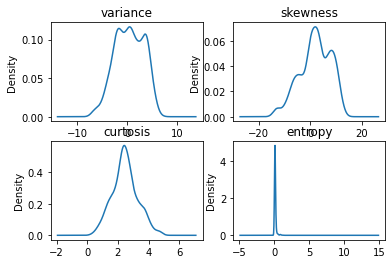

In [39]:
# Plotting the distribution of all the features in dataset to pick out the measure of central tendency that best fits the data

plot_number = 1

for x in X.columns:
    plt.subplot(2,2,plot_number)
    X[x].plot(kind="kde")
    plt.title(x)
    plot_number+=1

In [40]:
print("Mean: \n",X.mean(),"\n\nMedian: \n",X.median())

"""We can observe that significant difference cannot be observed between mean and median of each feature. Thus, we can take mean as a measure to calculate the central tendency and also use appropriate parametric tests for statistical analysis"""

Mean: 
 variance    0.433735
skewness    1.922353
curtosis    2.470018
entropy     0.166316
dtype: float64 

Median: 
 variance    0.496180
skewness    2.319650
curtosis    2.450047
entropy     0.124046
dtype: float64


'We can observe that significant difference cannot be observed between mean and median of each feature. Thus, we can take mean as a measure to calculate the central tendency and also use appropriate parametric tests for statistical analysis'

In [41]:
# Adding label back to X dataframe.

X['class'] = df['class']

In [42]:
# Importing 1 sample t-test from scipy.stats

from scipy.stats import ttest_1samp

#Creating an empty dataframe for collecting samples
stat_data = pd.DataFrame()

In [43]:
# Defining a function to perform 1 sample T-test

def one_sampTtest(data,feature):
    # Setting the sample size for analysis i.e., 25 percent of the whole dataset
    sample_size = int(len(data)*0.25)
    stat_data[feature+"_sample"] = np.random.choice(data[feature],sample_size,)
    t_test,p_value = ttest_1samp(stat_data[feature+"_sample"],data[feature].mean())
    print("The p value of ",feature," is ", p_value, " and ttest value is ",t_test)
    if (p_value) < 0.05:
        print('Insignificant value for feature',feature,"\n")

In [44]:
for x in X.columns:
    one_sampTtest(X,x)

# Now we can go ahead with this sample set for further analysis. 

# We are also accepting the null hypothesis as p value of all the features are greater than 0.05 (threshold)

The p value of  variance  is  0.6292444676104965  and ttest value is  -0.4832260192172954
The p value of  skewness  is  0.24264056522875166  and ttest value is  1.1704357985224216
The p value of  curtosis  is  0.786654948549995  and ttest value is  0.2708693171193671
The p value of  entropy  is  0.7049260706293075  and ttest value is  0.37899592929712267
The p value of  class  is  0.7866796438419343  and ttest value is  0.2708371829795203


In [45]:
stat_data.head(2)

,variance_sample,skewness_sample,curtosis_sample,entropy_sample,class_sample
0,-1.5078,-0.32902,2.541043,0.122824,0
1,1.2616,-4.44900,1.441388,0.131335,1


In [46]:
stat_data['class_sample'].value_counts()

0    188
1    155
Name: class_sample, dtype: int64

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


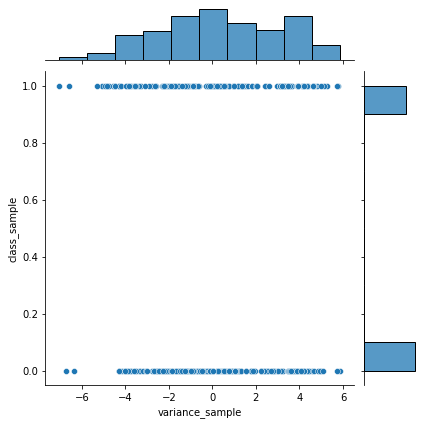

In [47]:
sns.jointplot(stat_data["variance_sample"],stat_data["class_sample"])

<AxesSubplot:xlabel='variance_sample', ylabel='Density'>

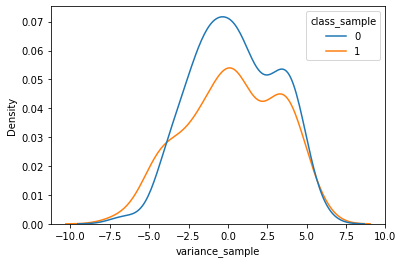

In [48]:
sns.kdeplot(x=stat_data["variance_sample"],hue=stat_data["class_sample"])

<AxesSubplot:xlabel='skewness_sample', ylabel='Density'>

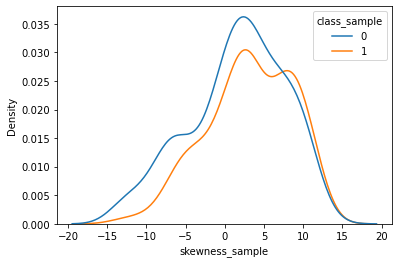

In [49]:
sns.kdeplot(x=stat_data["skewness_sample"],hue=stat_data["class_sample"])

<AxesSubplot:xlabel='curtosis_sample', ylabel='Density'>

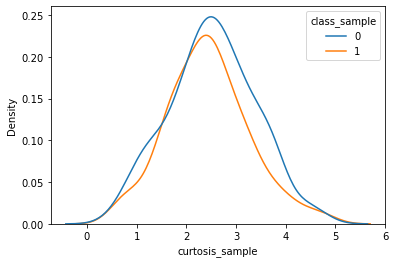

In [50]:
sns.kdeplot(x=stat_data["curtosis_sample"],hue=stat_data["class_sample"])

<AxesSubplot:xlabel='entropy_sample', ylabel='Density'>

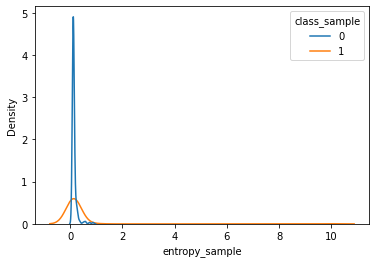

In [51]:
sns.kdeplot(x=stat_data["entropy_sample"],hue=stat_data["class_sample"])

In [52]:
# Defining a function to print out mean value of features based on label class

def label_mean(dataframe,feature,label):
    class_ind0mean = dataframe[dataframe[label] == dataframe[label].value_counts().index[0]][feature].mean()
    class_ind1mean = dataframe[dataframe[label] == dataframe[label].value_counts().index[1]][feature].mean()
    print(feature+"_mean of class 0 ",class_ind0mean)
    print(feature+"_mean of class 1 ",class_ind1mean,"\n")

In [53]:
for x in [x for x in stat_data.columns if x!="class_sample"]:
    label_mean(stat_data,x,"class_sample")

variance_sample_mean of class 0  0.4232535069148935
variance_sample_mean of class 1  0.28463676387096803 

skewness_sample_mean of class 0  1.5722361914893617
skewness_sample_mean of class 1  3.1648266838709675 

curtosis_sample_mean of class 0  2.5227715140214313
curtosis_sample_mean of class 1  2.4335102461487472 

entropy_sample_mean of class 0  0.14894921367090388
entropy_sample_mean of class 1  0.21189345780975533 



In [54]:
stat_data.head(2)

,variance_sample,skewness_sample,curtosis_sample,entropy_sample,class_sample
0,-1.5078,-0.32902,2.541043,0.122824,0
1,1.2616,-4.44900,1.441388,0.131335,1


In [55]:
from scipy.stats import ttest_ind

In [56]:
ttest_ind(X['variance'],X["skewness"],equal_var=False)

Ttest_indResult(statistic=-8.455277457595184, pvalue=5.3205340528802856e-17)

In [57]:
ttest_ind(X['variance'],X["curtosis"],equal_var=False)

Ttest_indResult(statistic=-25.477135534928713, pvalue=1.766249832787186e-120)

In [58]:
ttest_ind(X['variance'],X["entropy"],equal_var=False)

Ttest_indResult(statistic=3.4664791538515844, pvalue=0.0005432834561438756)

In [59]:
ttest_ind(X['curtosis'],X["skewness"],equal_var=False)

Ttest_indResult(statistic=3.422623781146879, pvalue=0.0006377636775642013)

Assessing the variance in the dataset

In [60]:
X.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,2.470018,0.166316,0.444606
std,2.842763,5.869047,0.826582,0.289538,0.497103
min,-7.042100,-13.773100,0.316228,0.090109,0.000000
25%,-1.773000,-1.708200,1.952194,0.110583,0.000000
50%,0.496180,2.319650,2.450047,0.124046,0.000000
75%,2.821475,6.814625,2.926662,0.160392,1.000000
max,6.824800,12.951600,4.828406,10.000000,1.000000


In [61]:
quantile1, quantile3 = X.quantile(0.25),X.quantile(0.75)

In [62]:
quantile1

variance   -1.773000
skewness   -1.708200
curtosis    1.952194
entropy     0.110583
class       0.000000
Name: 0.25, dtype: float64

In [63]:
quantile3

variance    2.821475
skewness    6.814625
curtosis    2.926662
entropy     0.160392
class       1.000000
Name: 0.75, dtype: float64

In [64]:
X['variance'].max() - X['variance'].min()

13.8669

<AxesSubplot:ylabel='Density'>

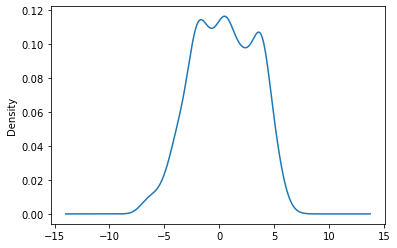

In [65]:
X['variance'].plot(kind='kde')

## MACHINE LEARNING ALGORITHM

In [66]:
# We are going to use gradient boosting algorithm 

In [67]:
# Dropping label from X that contains all the features

X.drop('class',axis=1,inplace=True)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.15,random_state=145)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
classifier = GradientBoostingClassifier()

In [73]:
params = {'loss':["deviance","exponential"],
          'learning_rate':[0.05,0.1,0.15,0.2,0.22,0.18,0.12],
          'n_estimators':[10,20,25,30,35,40,50,55,60,70,80,90,100,130,140,150,175,200],
          'criterion' : ['friedman_mse', 'mse', 'mae']
         }

In [74]:
randomized_cv = RandomizedSearchCV(classifier, param_distributions=params,n_jobs=-1,cv=20)

In [75]:
randomized_cv.get_params()

{'cv': 20,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(),
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'loss': ['deviance', 'exponential'],
  'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.22, 0.18, 0.12],
  'n_estimators': [10,
   20,
   25,
   30,
   35,


In [76]:
randomized_cv.fit(train_X,train_y)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.22, 0.18, 0.12],
                                        'loss': ['deviance', 'exponential'],
                                        'n_estimators': [10, 20, 25, 30, 35, 40,
                                                         50, 55, 60, 70, 80, 90,
                                                         100, 130, 140, 150,
                                                         175, 200]})

In [77]:
randomized_cv.best_params_

{'n_estimators': 200,
 'loss': 'deviance',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [78]:
randomized_cv.best_score_

0.9982758620689655

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [80]:
pred = randomized_cv.predict(test_X)
accuracy_score(test_y,pred)

0.9951456310679612

In [81]:
confusion_matrix(test_y,pred)

array([[122,   1],
       [  0,  83]])

In [82]:
import pickle

In [83]:
file = open('model.pkl','wb')

In [84]:
pickle.dump(randomized_cv,file)

In [85]:
pip freeze > requireent.txt

Note: you may need to restart the kernel to use updated packages.


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'ms

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'ms